In [15]:
from keras.models import Sequential
from tensorflow.keras import datasets
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

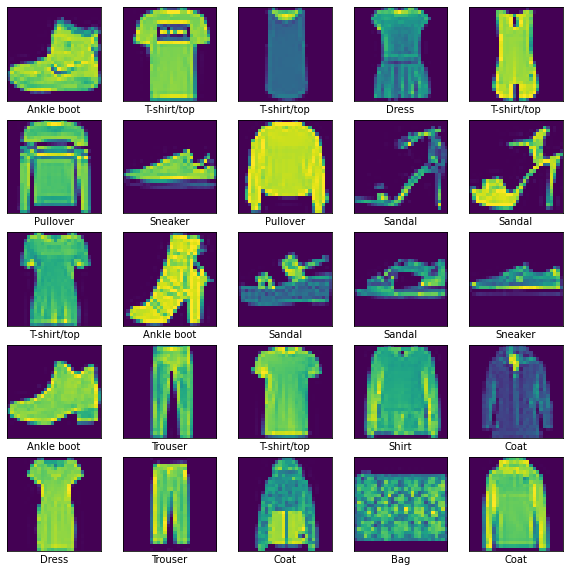

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
train_images[0].shape

(28, 28)

In [6]:
len(train_images), len(test_images)

(60000, 10000)

# ANN

In [56]:
ann = Sequential()
ann.add(Flatten())
ann.add(Dense(784, activation="relu"))
cnn.add(Dropout(0.3))
ann.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.3))
ann.add(Dense(10, activation="softmax"))

In [57]:
ann.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
history_ann = ann.fit(train_images, train_labels, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30


c:\users\kasia\appdata\local\programs\python\python39\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 [==============================] - 11s 6ms/step - loss: 0.4820 - accuracy: 0.8280 - val_loss: 0.3844 - val_accuracy: 0.8633
Epoch 2/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3646 - accuracy: 0.8666 - val_loss: 0.3964 - val_accuracy: 0.8553
Epoch 3/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3276 - accuracy: 0.8775 - val_loss: 0.3593 - val_accuracy: 0.8702
Epoch 4/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3003 - accuracy: 0.8882 - val_loss: 0.3750 - val_accuracy: 0.8705
Epoch 5/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2831 - accuracy: 0.8951 - val_loss: 0.3456 - val_accuracy: 0.8732
Epoch 6/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2667 - accuracy: 0.9005 - val_loss: 0.3118 - val_accuracy: 0.8897
Epoch 7/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2567 - accuracy: 0.9041 - val_loss: 0.3404 - val_accuracy: 0.8

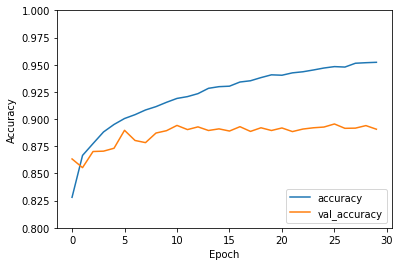

In [62]:
plt.plot(history_ann.history['accuracy'], label='accuracy')
plt.plot(history_ann.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [63]:
ann.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4695 - accuracy: 0.8864


[0.4695394039154053, 0.8863999843597412]

313/313 [==============================] - 1s 2ms/step


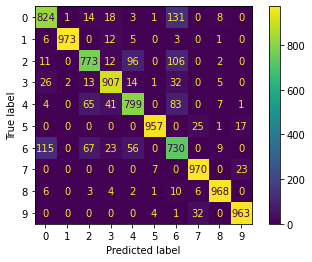

In [64]:
y_pred = ann.predict(test_images)
pred = []
for i in y_pred:
    pred.append(i.argmax())
    
cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# CNN

## 1

In [65]:
cnn = Sequential()
cnn.add(Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10))

In [66]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
history_cnn = cnn.fit(train_images, train_labels,
                     epochs=30, batch_size=32,
                     validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4638 - accuracy: 0.8385 - val_loss: 0.3495 - val_accuracy: 0.8783
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3239 - accuracy: 0.8868 - val_loss: 0.3238 - val_accuracy: 0.8887
Epoch 3/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2888 - accuracy: 0.8994 - val_loss: 0.2959 - val_accuracy: 0.8942
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9060 - val_loss: 0.2821 - val_accuracy: 0.9000
Epoch 5/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2503 - accuracy: 0.9116 - val_loss: 0.2801 - val_accuracy: 0.9028
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2367 - accuracy: 0.9164 - val_loss: 0.2810 - val_accuracy: 0.9023
Epoch 7/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2243 - accuracy: 0.9206 - val_loss: 0.2735 - val_accuracy:

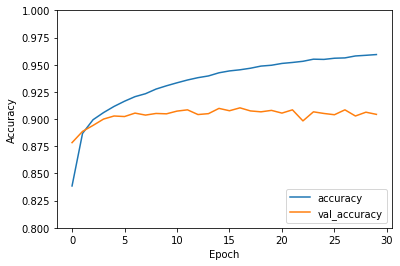

In [68]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [69]:
cnn.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.9056


[0.3216344714164734, 0.9056000113487244]

313/313 [==============================] - 1s 2ms/step


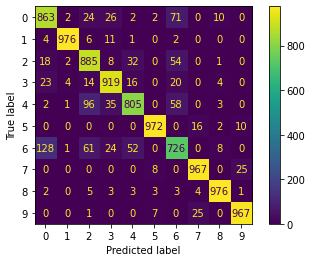

In [70]:
y_pred = cnn.predict(test_images)
pred = []
for i in y_pred:
    pred.append(i.argmax())
    
cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 2

In [71]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Dropout(0.3))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10))

In [72]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
history_cnn = cnn.fit(train_images, train_labels,
                     epochs=30, batch_size=32,
                     validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 30s 18ms/step - loss: 0.4142 - accuracy: 0.8549 - val_loss: 0.3343 - val_accuracy: 0.8890
Epoch 2/30
1688/1688 [==============================] - 30s 18ms/step - loss: 0.3004 - accuracy: 0.8931 - val_loss: 0.3045 - val_accuracy: 0.8947
Epoch 3/30
1688/1688 [==============================] - 30s 18ms/step - loss: 0.2678 - accuracy: 0.9053 - val_loss: 0.2952 - val_accuracy: 0.8990
Epoch 4/30
1688/1688 [==============================] - 30s 18ms/step - loss: 0.2475 - accuracy: 0.9106 - val_loss: 0.2710 - val_accuracy: 0.9080
Epoch 5/30
1688/1688 [==============================] - 30s 18ms/step - loss: 0.2311 - accuracy: 0.9169 - val_loss: 0.2903 - val_accuracy: 0.8998
Epoch 6/30
1688/1688 [==============================] - 30s 18ms/step - loss: 0.2161 - accuracy: 0.9228 - val_loss: 0.2630 - val_accuracy: 0.9068
Epoch 7/30
1688/1688 [==============================] - 30s 17ms/step - loss: 0.2041 - accuracy: 0.9255 - val_loss: 0.2772 -

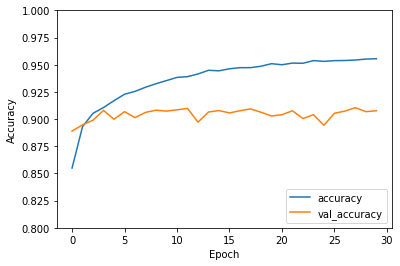

In [74]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [75]:
cnn.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.9070


[0.2986220419406891, 0.9070000052452087]

313/313 [==============================] - 1s 3ms/step


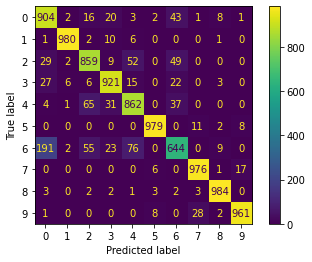

In [76]:
y_pred = cnn.predict(test_images)
pred = []
for i in y_pred:
    pred.append(i.argmax())
    
cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 3

In [77]:
cnn = Sequential()
cnn.add(Conv2D(48, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(24, (3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10))

In [78]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
history_cnn = cnn.fit(train_images, train_labels,
                     epochs=30, batch_size=32,
                     validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 27s 16ms/step - loss: 0.5714 - accuracy: 0.7911 - val_loss: 0.4225 - val_accuracy: 0.8562
Epoch 2/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.3866 - accuracy: 0.8595 - val_loss: 0.3485 - val_accuracy: 0.8823
Epoch 3/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.3468 - accuracy: 0.8731 - val_loss: 0.3167 - val_accuracy: 0.8883
Epoch 4/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.3199 - accuracy: 0.8832 - val_loss: 0.2984 - val_accuracy: 0.8937
Epoch 5/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2998 - accuracy: 0.8902 - val_loss: 0.2786 - val_accuracy: 0.8957
Epoch 6/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2840 - accuracy: 0.8946 - val_loss: 0.2748 - val_accuracy: 0.9005
Epoch 7/30
1688/1688 [==============================] - 26s 15ms/step - loss: 0.2735 - accuracy: 0.9002 - val_loss: 0.2739 -

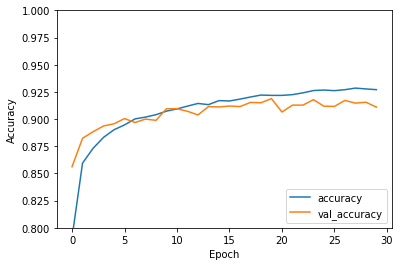

In [80]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [81]:
cnn.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9114


[0.25175726413726807, 0.9114000201225281]

313/313 [==============================] - 1s 3ms/step


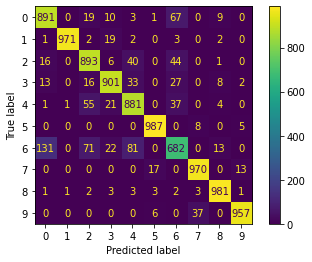

In [82]:
y_pred = cnn.predict(test_images)
pred = []
for i in y_pred:
    pred.append(i.argmax())
    
cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 4

In [83]:
cnn = Sequential()
cnn.add(Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10))

In [84]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
history_cnn = cnn.fit(train_images, train_labels,
                     epochs=30, batch_size=32,
                     validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 21s 12ms/step - loss: 0.4358 - accuracy: 0.8456 - val_loss: 0.3184 - val_accuracy: 0.8862
Epoch 2/30
1688/1688 [==============================] - 21s 13ms/step - loss: 0.2997 - accuracy: 0.8902 - val_loss: 0.2829 - val_accuracy: 0.9005
Epoch 3/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2579 - accuracy: 0.9062 - val_loss: 0.2607 - val_accuracy: 0.9065
Epoch 4/30
1688/1688 [==============================] - 23s 13ms/step - loss: 0.2305 - accuracy: 0.9142 - val_loss: 0.2611 - val_accuracy: 0.9027
Epoch 5/30
1688/1688 [==============================] - 21s 13ms/step - loss: 0.2081 - accuracy: 0.9222 - val_loss: 0.2723 - val_accuracy: 0.8967
Epoch 6/30
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1900 - accuracy: 0.9295 - val_loss: 0.2401 - val_accuracy: 0.9160
Epoch 7/30
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1770 - accuracy: 0.9334 - val_loss: 0.2318 -

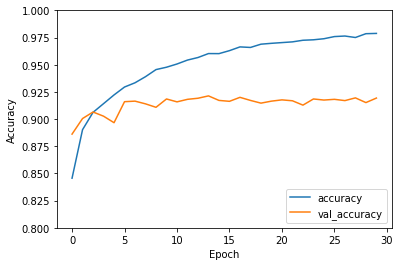

In [86]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [87]:
cnn.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.9147


[0.3718893527984619, 0.9146999716758728]

313/313 [==============================] - 1s 2ms/step


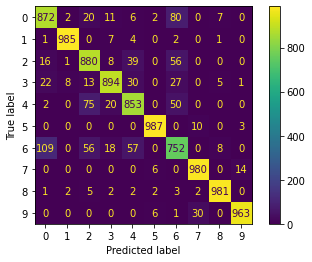

In [88]:
y_pred = cnn.predict(test_images)
pred = []
for i in y_pred:
    pred.append(i.argmax())
    
cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 5

In [89]:
cnn = Sequential()
cnn.add(Conv2D(24, (5, 5), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10))

In [90]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [91]:
history_cnn = cnn.fit(train_images, train_labels,
                     epochs=30, batch_size=32,
                     validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.4491 - accuracy: 0.8392 - val_loss: 0.3310 - val_accuracy: 0.8798
Epoch 2/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3140 - accuracy: 0.8868 - val_loss: 0.3026 - val_accuracy: 0.8940
Epoch 3/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2729 - accuracy: 0.9000 - val_loss: 0.2806 - val_accuracy: 0.8993
Epoch 4/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2458 - accuracy: 0.9087 - val_loss: 0.2613 - val_accuracy: 0.9075
Epoch 5/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2242 - accuracy: 0.9170 - val_loss: 0.2649 - val_accuracy: 0.9045
Epoch 6/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2061 - accuracy: 0.9229 - val_loss: 0.2548 - val_accuracy: 0.9103
Epoch 7/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1916 - accuracy: 0.9281 - val_loss: 0.2509 -

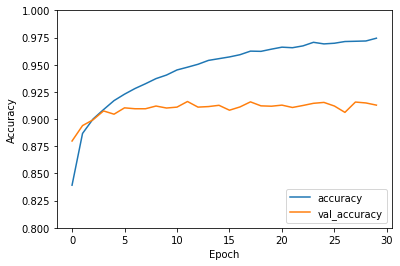

In [92]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [93]:
cnn.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.9147


[0.36879676580429077, 0.9146999716758728]

313/313 [==============================] - 1s 2ms/step


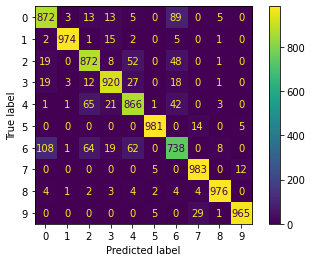

In [94]:
y_pred = cnn.predict(test_images)
pred = []
for i in y_pred:
    pred.append(i.argmax())
    
cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()